## Facebook Ads Predictor - Logistic Regression
In this module, we will be working with a dataset from a mock company that simulates a targeted marketing ad campaign on Facebook for a company that wants to predict whether or a customer will click on their ad given some personal data. The recorded personal data in the dataset is:
* Name
* E-mail
* Country
* Time on Facebook
* Estimated Salary (derived)
* Target Variable: Clickd on Ad (0 for not, 1 for click)

### Libraries & Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
ads_df = pd.read_csv('Facebook_Ads_2.csv', encoding='ISO-8859-1')

## Exploratory Data Analysis (EDA)

In [3]:
ads_df.sample(10)

,Names,emails,Country,Time Spent on Site,Salary,Clicked
353,"Ortiz, Drew P.",tincidunt@vel.edu,Seychelles,24.116989,47698.82505,0
10,Jerome Rowe,ipsum.cursus@dui.org,Sint Maarten,33.272572,54127.01715,0
238,Callum U. Sweet,sem.ut@odio.edu,Equatorial Guinea,19.728562,42876.16824,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
202,Hammett A. Manning,sapien.cursus.in@netus.edu,Samoa,31.579197,33465.46151,0
305,"Ashley, Macon Z.",metus.Vivamus.euismod@arcuVivamus.co.uk,Bosnia and Herzegovina,44.012506,62854.41847,1
145,Lawrence Ryan,condimentum@duilectus.co.uk,Tunisia,29.468501,69107.48014,1
492,Nolan,Donec.at@neccursus.co.uk,Latvia,5.000000,47329.56584,0
386,"Sutton, Michelle D.",enim.Mauris@Namac.net,Madagascar,26.619002,76505.55871,1
18,Sloane Mann,at.augue@augue.net,Chad,48.870175,34774.44407,1


In [4]:
ads_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time Spent on Site,499.0,32.920178,9.103455,5.0,26.425044,33.196067,39.114995,60.0
Salary,499.0,52896.992469,18989.183150,20.0,38888.117260,52840.913110,65837.288190,100000.0
Clicked,499.0,0.501002,0.500501,0.0,0.000000,1.000000,1.000000,1.0


In [5]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
Names                 499 non-null object
emails                499 non-null object
Country               499 non-null object
Time Spent on Site    499 non-null float64
Salary                499 non-null float64
Clicked               499 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


### Visualizations

In [6]:
click = ads_df[ads_df['Clicked']==1]
no_click = ads_df[ads_df['Clicked']==0]

print(f'Total Number of Individuals: {len(ads_df)}')
print(f'Total Number of Clicks: {len(click)}')
print(f'Total Number of Non-Clicks: {len(no_click)}')

Total Number of Individuals: 499
Total Number of Clicks: 250
Total Number of Non-Clicks: 249


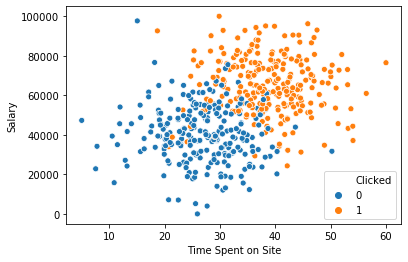

In [7]:
sns.scatterplot(ads_df['Time Spent on Site'], ads_df['Salary'], hue=ads_df['Clicked'])
plt.show()

From our scatterplot, it appears that as customers spend more time on Facebook, there is a stronger chance that you click on the ad. If you have more disposable income (higher salary), you are more likely to click on the ad.

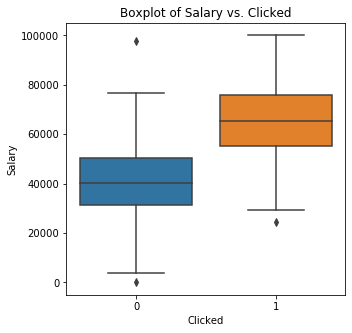

In [8]:
plt.figure(figsize = (5,5))
sns.boxplot(x='Clicked', y='Salary', data=ads_df)
plt.title('Boxplot of Salary vs. Clicked')
plt.show()

This boxplot gives us the sense that those with a higher salary are more likely to click on the ad.

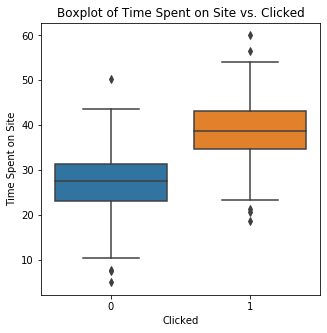

In [9]:
plt.figure(figsize = (5,5))
sns.boxplot(x='Clicked', y='Time Spent on Site', data=ads_df)
plt.title('Boxplot of Time Spent on Site vs. Clicked')
plt.show()

This boxplot gives us the sense that those who spend around 35-45 minutes are more likely to click on the ad.

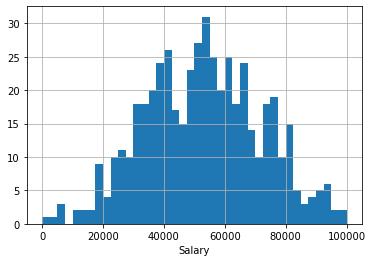

In [10]:
ads_df['Salary'].hist(bins=40)
plt.xlabel('Salary')
plt.show()

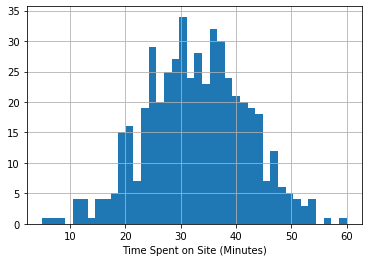

In [11]:
ads_df['Time Spent on Site'].hist(bins=40)
plt.xlabel('Time Spent on Site (Minutes)')
plt.show()

## Data Preprocessing

In [12]:
# Drop unused columns (we may use Country later through encoding)
ads_df.drop(['Names', 'emails', 'Country'], axis=1, inplace=True)

In [14]:
# Split the data into features and target variable
X = ads_df.drop(['Clicked'], axis=1)
y = ads_df['Clicked']

We will need to apply some feature scaling since our values for time spent is between 0 to 60 whereas our salary is between 0 and 100000.

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Model Training and Testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

## Model Evaluation
Let us first look at the metrics for our training set then our testing set:

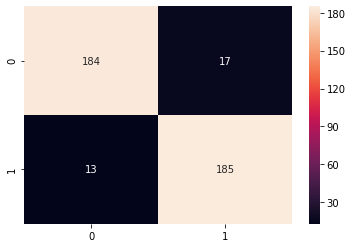

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [27]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       201
           1       0.92      0.93      0.93       198

    accuracy                           0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399



Now let us look at our testing data:

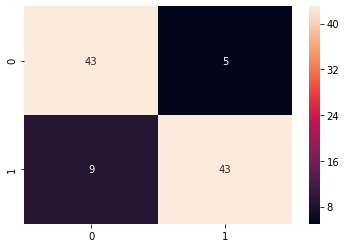

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [29]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



While our model did decently well on our training set, here according to our classification metrics, our model isn't terrible, but we could look to include country through encoding in the future.

## Model Visualization

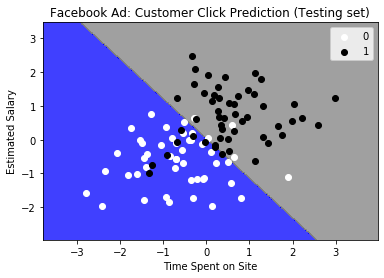

In [35]:
from matplotlib.colors import ListedColormap

# Can change this later
X_set, y_set = X_test, y_test

# Create regions/split by color
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'gray')))

# Set graph limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot each scatterpoint
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('white', 'black'))(i), label = j)

# Tidy up our graph a little
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()